In [139]:
# Import dependencies
!pip install tweepy==4.9.0
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jayan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [65]:
# Put your Bearer Token in the parenthesis below
client = tweepy.Client(bearer_token='')

In [69]:
# Pull tweets from twitter
query = '#apple -is:retweet lang:en'
paginator = tweepy.Paginator(
client.search_recent_tweets,   # method we want to use
query=query,                   # argument for this method
max_results=100,               # how many tweets per page
limit=10                       # how many pages to retrieve
)
# Print the pulled tweets
tweet_list = []
for tweet in paginator.flatten(): # Total number of tweets to retrieve
    tweet_list.append(tweet)
    print(tweet)

Tim Cook Negotiates with Trump Administration to Temporarily Spare Apple from Tariffs

#apple #TimCook #tradenegotiations #Trumptariffs #USChinatradewar 
https://t.co/ulFtuuWYAB
How Tim Cook Can Help #Apple Survive the US Tariff Storm #Temporarily。#openAI #AI #DeepSeek #Trump #Musk #trade #tariff #Metaverse #Blockchain #NFT #music https://t.co/9BMQZRutZz
Apple Removes DVPN App in Russia After Gov’t Takedown Request

#Apple #Russia #Censorship #CyberSec

https://t.co/lv4Q5FMFaq
Just heard #Apple is paying up BIG for the 'accidental eavesdropping' situation. Hey Siri, remind me to ask @SafeTechExpert - is privacy just a luxury these days, or can we all afford some? 💭🗣️💰 #CyberSecurity #TechNews #SiriListening https://t.co/njV4IyzdgY
How #TimCook Can Help #Apple Survive the #US #tariff  Storm Temporarily.#public #knowledge #openAI #AI #DeepSeek #Trump #Musk #trade #tariff #Metaverse #Blockchain #NFT #chips https://t.co/yBNUhnSlrW
#Apple where the originals live ❤️

#USA #EU #UK #Netherlan

TooManyRequests: 429 Too Many Requests
Too Many Requests

In [71]:
#Creating new dataframe and new features
tweet_list_df = pd.DataFrame(tweet_list)
tweet_list_df = pd.DataFrame(tweet_list_df['text'])
tweet_list_df.head(5)

,text
0,Tim Cook Negotiates with Trump Administration ...
1,How Tim Cook Can Help #Apple Survive the US Ta...
2,Apple Removes DVPN App in Russia After Gov’t T...
3,Just heard #Apple is paying up BIG for the 'ac...
4,How #TimCook Can Help #Apple Survive the #US #...


In [73]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only in lowercase'''
    sentence = sen.lower()
    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)
    # Remove punctuations and numbers
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence) 
    return sentence

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\jayan\AppData\Local\Temp\ipykernel_18288\3413778442.py:5: SyntaxWarning: invalid escape sequence '\w'
  sentence = re.sub('RT @\w+: '," ", sentence)
C:\Users\jayan\AppData\Local\Temp\ipykernel_18288\3413778442.py:7: SyntaxWarning: invalid escape sequence '\w'
  sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)


In [75]:
cleaned_tweets = []
for tweet in tweet_list_df['text']:
    cleaned_tweet = preprocess_tweet(tweet)
    cleaned_tweets.append(cleaned_tweet)
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_list_df.head(5)

,text,cleaned
0,Tim Cook Negotiates with Trump Administration ...,tim cook negotiates with trump administration ...
1,How Tim Cook Can Help #Apple Survive the US Ta...,how tim cook can help apple survive the us tar...
2,Apple Removes DVPN App in Russia After Gov’t T...,apple removes dvpn app in russia after gov tak...
3,Just heard #Apple is paying up BIG for the 'ac...,just heard apple is paying up big for the acci...
4,How #TimCook Can Help #Apple Survive the #US #...,how timcook can help apple survive the us tari...


In [79]:
#Calculating Negative, Positive, Neutral and Compound values
tweet_list_df[['polarity', 'subjectivity']] = tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list_df['cleaned'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweet_list_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_list_df.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list_df.loc[index, 'sentiment'] = "neutral"
    
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp
tweet_list_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Tim Cook Negotiates with Trump Administration ...,tim cook negotiates with trump administration ...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
1,How Tim Cook Can Help #Apple Survive the US Ta...,how tim cook can help apple survive the us tar...,0.0,0.000000,positive,0.000,0.891,0.109,0.4019
2,Apple Removes DVPN App in Russia After Gov’t T...,apple removes dvpn app in russia after gov tak...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
3,Just heard #Apple is paying up BIG for the 'ac...,just heard apple is paying up big for the acci...,0.0,0.100000,negative,0.039,0.961,0.000,-0.0772
4,How #TimCook Can Help #Apple Survive the #US #...,how timcook can help apple survive the us tari...,0.0,0.066667,positive,0.000,0.895,0.105,0.4019


In [81]:
#Creating new dataframes for all sentiments (positive, negative and neutral)
tweet_list_df_negative = tweet_list_df[tweet_list_df["sentiment"]=="negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["sentiment"]=="positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["sentiment"]=="neutral"]

In [83]:
#Function for count_values_in single columns
def count_values_in_column(data,feature):
    total = data.loc[:,feature].value_counts(dropna=False)
    percentage = round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tweet_list_df,"sentiment")

,Total,Percentage
sentiment,,
positive,44,44.0
neutral,42,42.0
negative,14,14.0


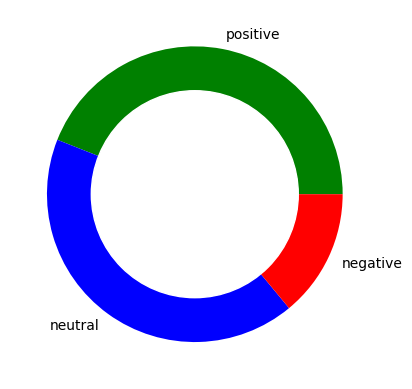

In [85]:
# create data for Pie Chart
pichart = count_values_in_column(tweet_list_df,"sentiment")
# names= pc.index
# size=pc["Percentage"]
names= pichart.index
size=pichart["Percentage"]
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [101]:
import os

# Replace this with your actual local path to the directory containing the notebook
# Remove the filename from the path to get just the directory
project_path = "C:/Users/jayan/Downloads/minor project"  # Removed the filename

# Change to that directory
os.chdir(project_path)

# Verify current working directory
print(f"Current working directory: {os.getcwd()}")

Current working directory: C:\Users\jayan\Downloads\minor project


In [127]:
# Define the create_wordcloud function if it's not already defined
def create_wordcloud(text_data, output_path='cloud.png'):
    # Create directory if it doesn't exist
    output_dir = os.path.dirname(output_path)
    if output_dir and not os.path.exists(output_dir):
        os.makedirs(output_dir)
   

 
    # Generate the wordcloud
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         max_words=200).generate(' '.join(text_data))
    
    # Display the wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    
    # Save the wordcloud
    wordcloud.to_file(output_path)
    plt.show()

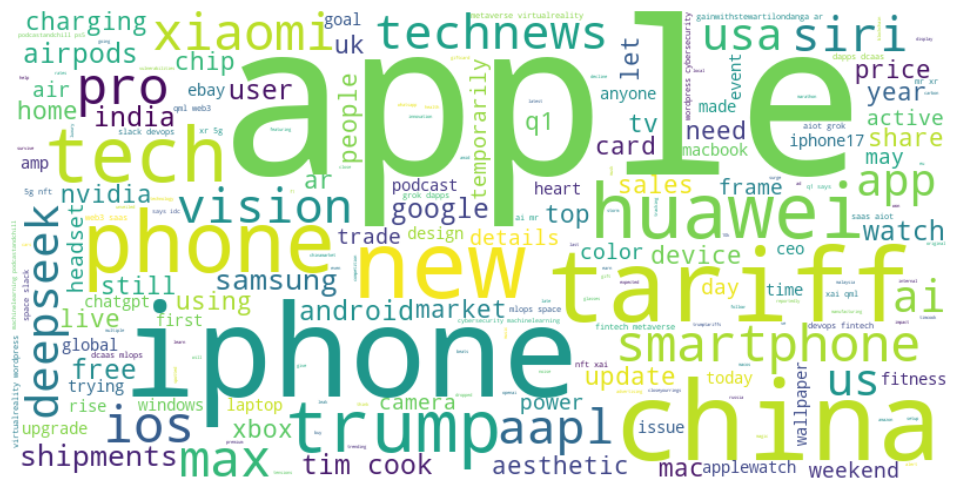

In [129]:
# Creating wordcloud for all tweets
# Use a simple path or create the directory first
create_wordcloud(tweet_list_df["cleaned"].values, 'cloud.png')
# create_wordcloud(tweet_list_df_positive["text"].values, 'positive_cloud.png')
# create_wordcloud(tweet_list_df_negative["cleaned"].values, 'negative_cloud.png')
# create_wordcloud(tweet_list_df_neutral["text"].values, 'neutral_cloud.png')

In [131]:
#Calculating tweet's lenght and word count
tweet_list_df['text_len'] = tweet_list_df['cleaned'].astype(str).apply(len)
tweet_list_df['text_word_count'] = tweet_list_df['cleaned'].apply(lambda x: len(str(x).split()))

In [133]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_len.mean()),2)
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,28.29
neutral,20.12
positive,24.34


In [137]:
tweet_list_df.to_csv("./c2_sentimentanalysis_output.csv", sep=',', encoding='UTF-8')
tweet_list_df.head(11)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,Tim Cook Negotiates with Trump Administration ...,tim cook negotiates with trump administration ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,147,17
1,How Tim Cook Can Help #Apple Survive the US Ta...,how tim cook can help apple survive the us tar...,0.000000,0.000000,positive,0.000,0.891,0.109,0.4019,142,23
2,Apple Removes DVPN App in Russia After Gov’t T...,apple removes dvpn app in russia after gov tak...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,93,14
3,Just heard #Apple is paying up BIG for the 'ac...,just heard apple is paying up big for the acci...,0.000000,0.100000,negative,0.039,0.961,0.000,-0.0772,200,33
4,How #TimCook Can Help #Apple Survive the #US #...,how timcook can help apple survive the us tari...,0.000000,0.066667,positive,0.000,0.895,0.105,0.4019,158,24
5,#Apple where the originals live ❤️\n\n#USA #EU...,apple where the originals live usa eu uk neth...,0.136364,0.500000,neutral,0.000,1.000,0.000,0.0000,59,10
6,#Apple Do you need staff in the AI ​​departmen...,apple do you need staff in the ai department ...,0.200000,0.300000,positive,0.000,0.860,0.140,0.4754,101,20
7,Apple’s share in China’s lucrative smartphone ...,apple share in china lucrative smartphone mark...,-0.051852,0.262963,positive,0.000,0.936,0.064,0.2960,229,35
8,🚨 Urgent Cybersecurity Alert: #Apple Users at ...,urgent cybersecurity alert apple users at ris...,-0.086111,0.325000,positive,0.173,0.514,0.313,0.4588,112,16
9,"Upcoming iPhone Fold display details leak, sug...",upcoming iphone fold display details leak sugg...,0.500000,0.500000,negative,0.112,0.888,0.000,-0.3400,139,20


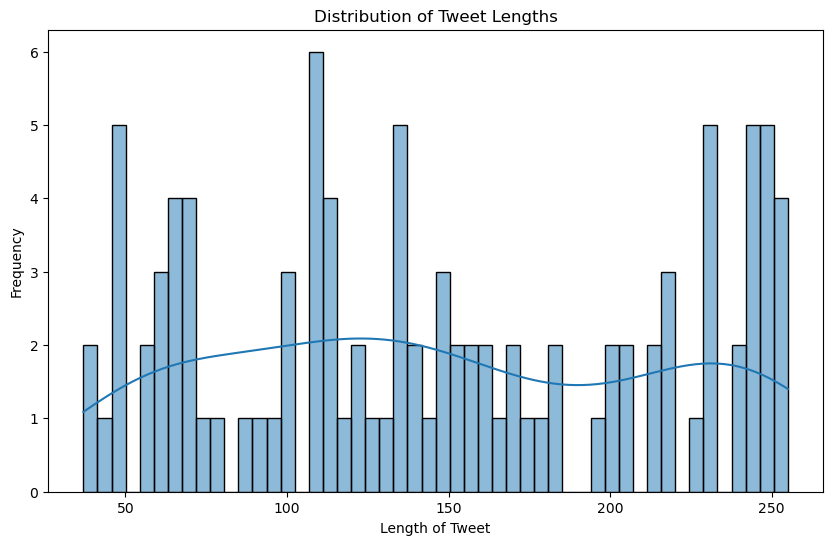

In [141]:
tweet_list_df['tweet_length'] = tweet_list_df['cleaned'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(tweet_list_df['tweet_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length of Tweet')
plt.ylabel('Frequency')
plt.show()

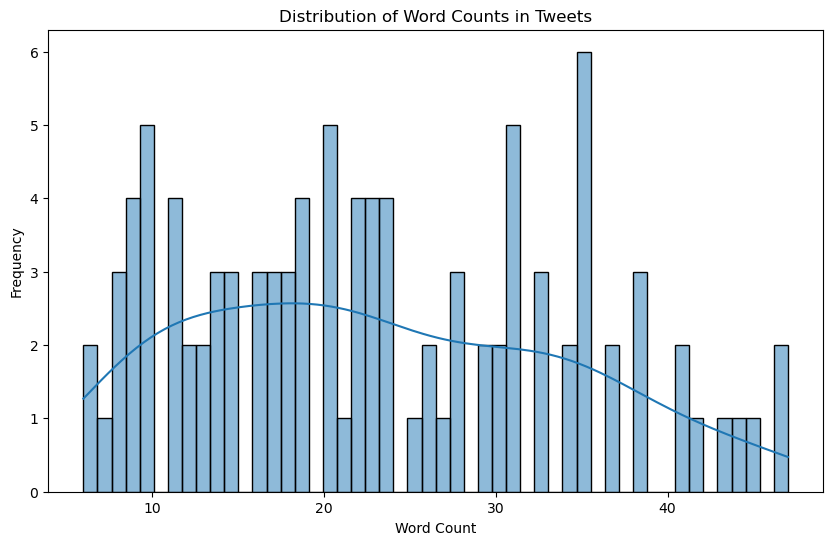

In [143]:
tweet_list_df['word_count'] = tweet_list_df['cleaned'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(tweet_list_df['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Counts in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

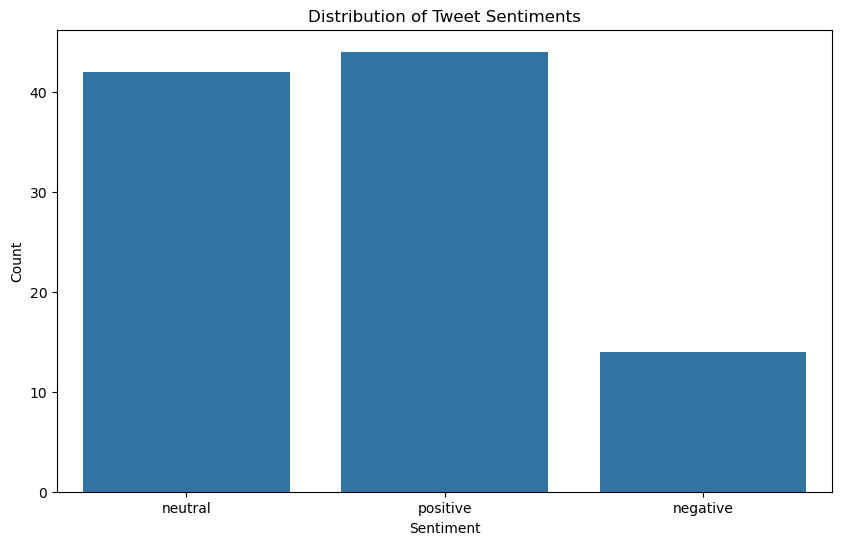

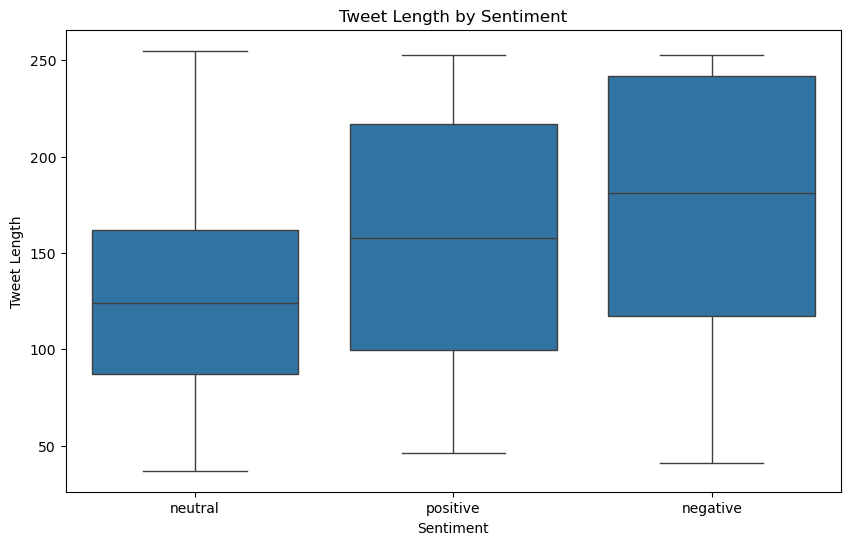

In [149]:
if 'sentiment' in tweet_list_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='sentiment', data=tweet_list_df)
    plt.title('Distribution of Tweet Sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()
    
    # Average tweet length by sentiment
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='sentiment', y='tweet_length', data=tweet_list_df)
    plt.title('Tweet Length by Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Tweet Length')
    plt.show()


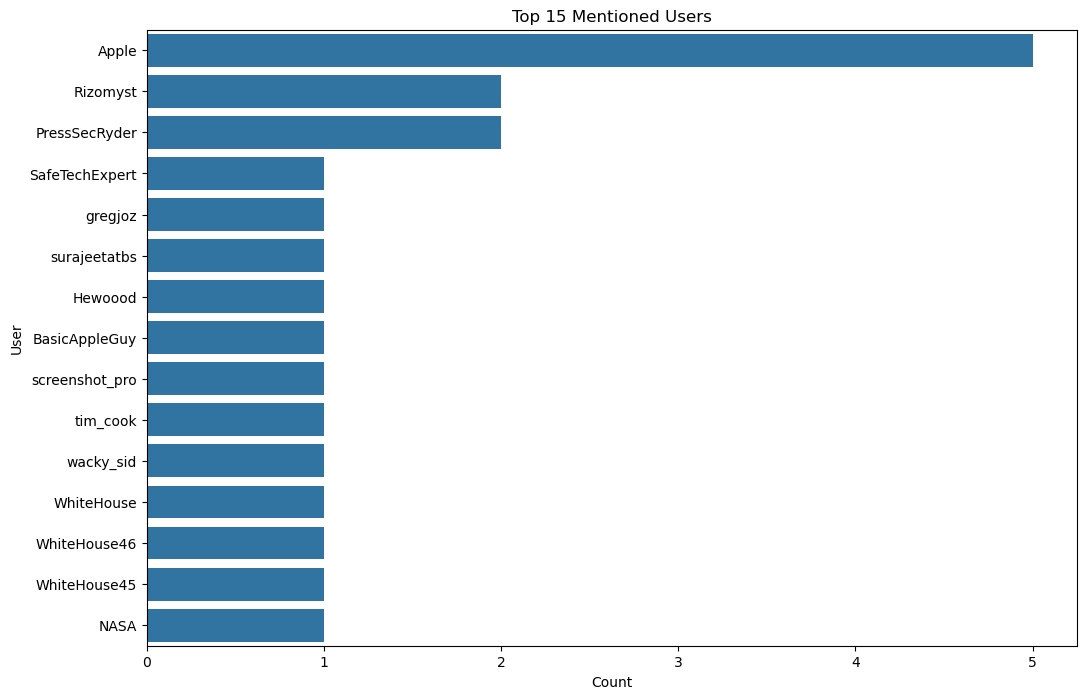

In [157]:
def extract_mentions(text):
    if isinstance(text, str):
        return re.findall(r'@(\w+)', text)
    return []

if 'text' in tweet_list_df.columns:  # Use original text if available
    tweet_list_df['mentions'] = tweet_list_df['text'].apply(extract_mentions)
else:
    tweet_list_df['mentions'] = tweet_list_df['cleaned'].apply(extract_mentions)
    
all_mentions = [mention for mentions in tweet_list_df['mentions'] for mention in mentions]
top_mentions = Counter(all_mentions).most_common(15)

if top_mentions:  # Only plot if mentions were found
    mentions, counts = zip(*top_mentions)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(counts), y=list(mentions))
    plt.title('Top 15 Mentioned Users')
    plt.xlabel('Count')
    plt.ylabel('User')
    plt.show()


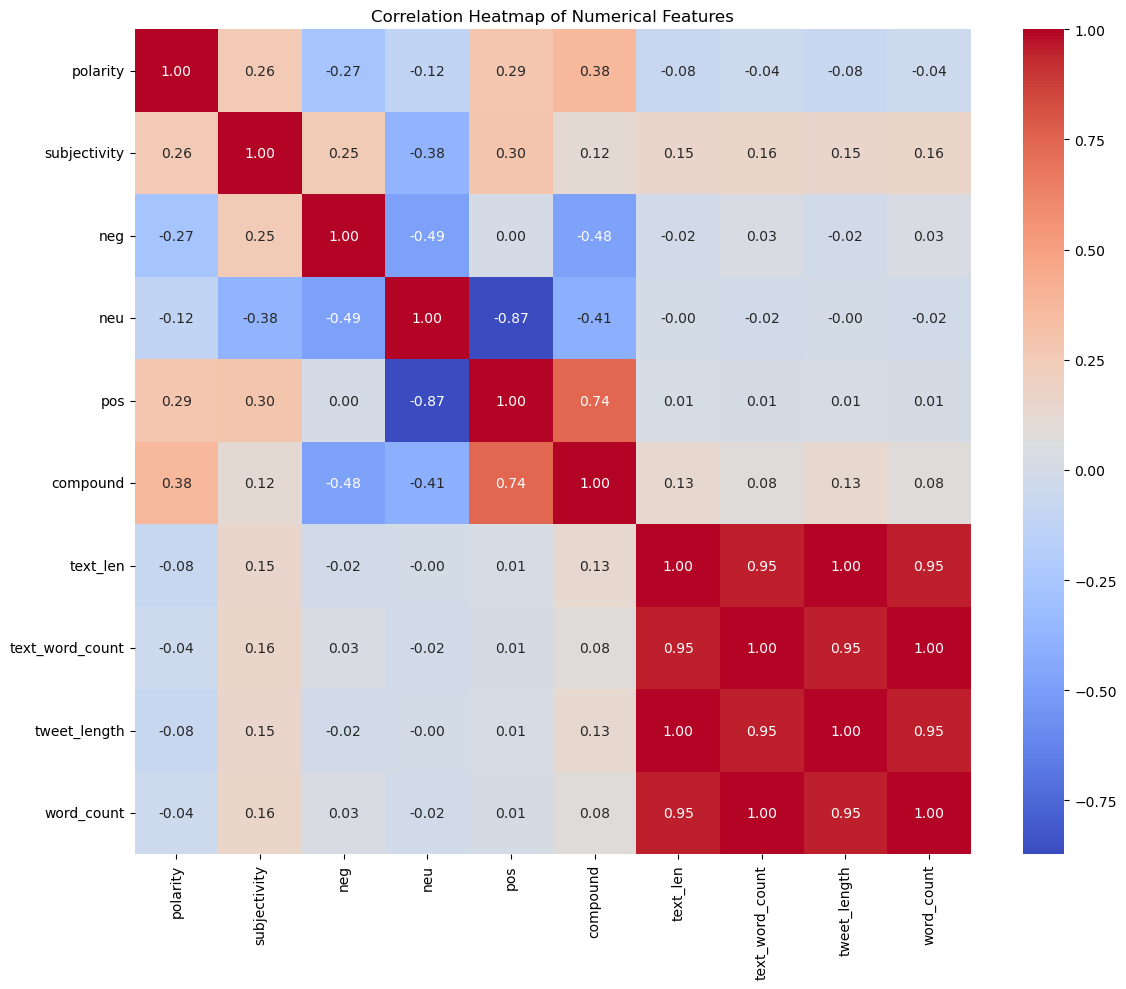

In [159]:
numeric_df = tweet_list_df.select_dtypes(include=[np.number])
if numeric_df.shape[1] > 1:  # Only create heatmap if multiple numeric columns
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Numerical Features')
    plt.tight_layout()
    plt.show()


In [163]:
import pickle
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Train/setup your model (here, just initializing VADER)
analyzer = SentimentIntensityAnalyzer()

# Save the analyzer
with open("vader_sentiment_model.pkl", "wb") as f:
    pickle.dump(analyzer, f)
